## Title: DSC530_ASumbaraju_Exercise3_2

## author: SumbarajuAditya

## Date: 044/04/2021

## output: Jupiter Notebook

## Comments: Few necessary supportive steps included to support Homework.


In [23]:
from __future__ import print_function, division

import nsfg


Read NSFG data into a Pandas DataFrame.

In [24]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [25]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [26]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [27]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [28]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [29]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [30]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [31]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [32]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [33]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [34]:
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [35]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [36]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [37]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [38]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [39]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with `caseid` 1?

In [40]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [41]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [42]:
preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

## Exercises from Chapter 1 

## Exercise1.1,Exercise 1.2,Exercise 1.3

In [44]:
# Exercise 1.2

import numpy as np
import thinkstats2
import nsfg


resp = nsfg.ReadFemResp()
    
resp.head()


,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [47]:

def ValidatePregnum(resp):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    """
    # read the pregnancy frame
    preg = nsfg.ReadFemPreg()

    # make the map from caseid to list of pregnancy indices
    preg_map = nsfg.MakePregMap(preg)

    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def Results():
    """Tests the functions in this module.

    script: string script name
    """
    resp = nsfg.ReadFemResp()

    assert (len(resp) == 7643)
    assert (resp.pregnum.value_counts()[1] == 1267)
    assert (ValidatePregnum(resp))
    
    print("1. of respondents: %d" % (len(resp)))
    print("2. of pregnancies: %d" % (resp.pregnum.value_counts()[1]))
    print("3. Validation of pregnancy fles by comparing pregnum for each respondent with the number of records in the pregnancy file: %s" %  ValidatePregnum(resp))

Results()


1. of respondents: 7643
2. of pregnancies: 1267
3. Validation of pregnancy fles by comparing pregnum for each respondent with the number of records in the pregnancy file: True


## Exercises from Chapter 2 

## Exercise 2.1,Exercise 2.2,Exercise 2.3,Exercise 2.4

In [48]:
#Exercise 2.1
import gzip, shutil

with gzip.open('2002FemPreg.dat.gz', 'r') as f_in, open('2002FemPreg.dat', 'wb') as f_out:
  shutil.copyfileobj(f_in, f_out)

In [49]:
import pandas as pd
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (57, 59),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,81.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,71.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,9.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,7.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,6.0,39,1,3.0,18.0,12999.542264



##observations:
1. From the above stats it is evident that  >9,000 of the 13,500 pregnancies here result in live births. and the key observation we can make it out that the data is fairly evenly split between first baby and other babies.

2. Pregnancy lengths for first babies seem to be only slightly higher (0.078 weeks) than for other babies. 

In [50]:
live_births = pregnancies[pregnancies["outcome"] == 1]
print("# of live births: %d" % len(live_births))
first_babies = live_births[live_births["birthord"] == 1]
other_babies = live_births[live_births["birthord"] != 1]
print("# first babies: %d" % len(first_babies))
print("# other babies: %d" % len(other_babies))
avg_prglen_first_baby = first_babies["prglength"].mean()
avg_prglen_other_baby = other_babies["prglength"].mean()
print("Average pregnancy length for first baby: %.3f weeks" % (avg_prglen_first_baby))
print("Average pregnancy length for other baby: %.3f weeks" % (avg_prglen_other_baby))
print("Difference: %.3f weeks" % (avg_prglen_first_baby - avg_prglen_other_baby))

# of live births: 9148
# first babies: 4413
# other babies: 4735
Average pregnancy length for first baby: 38.601 weeks
Average pregnancy length for other baby: 38.523 weeks
Difference: 0.078 weeks


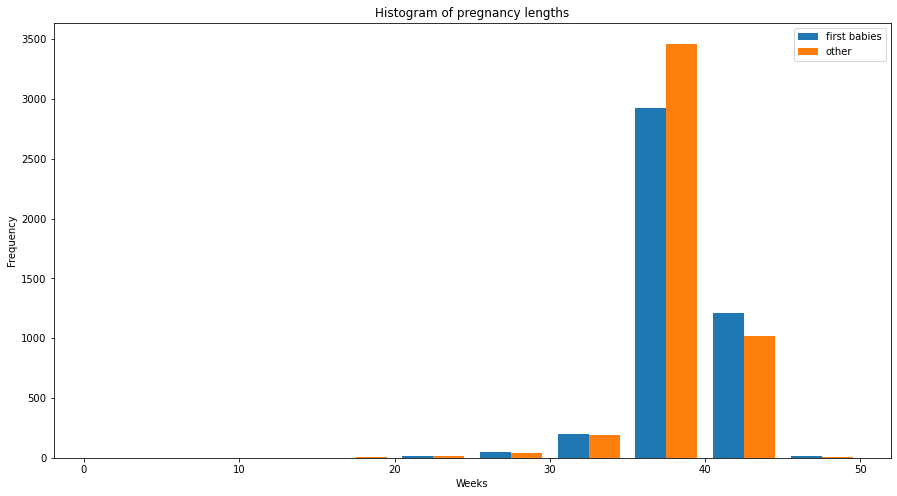

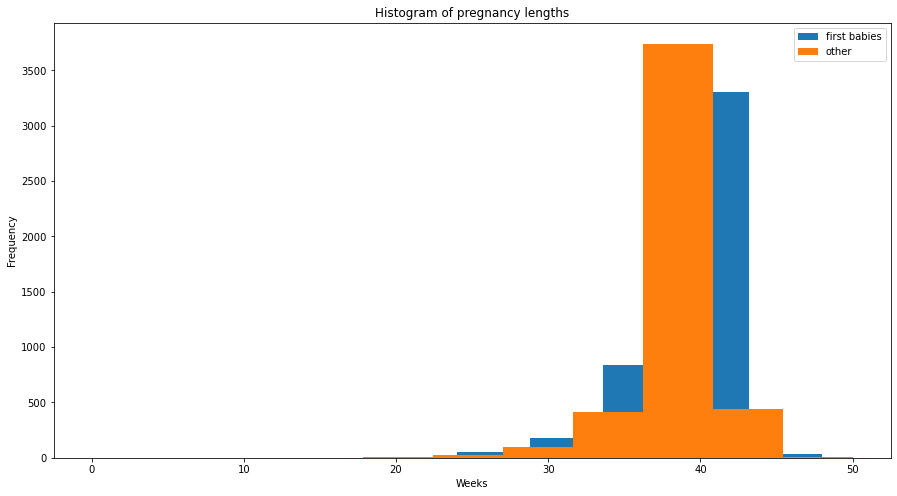

In [51]:
import matplotlib.pyplot as plt
first_child = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] == 1)]['prglength']
other = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] != 1)]['prglength']
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.hist([first_child, other],label=['first babies', 'other'])
ax.set_xlabel('Weeks')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of pregnancy lengths')
plt.legend()
plt.show()

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.hist(first_child, label='first babies')
plt.hist(other, label='other')
ax.set_xlabel('Weeks')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of pregnancy lengths')
plt.legend()
plt.show()



## Exercise 2.4 - 
Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

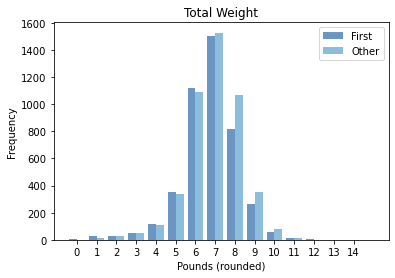

In [52]:
#Exercise 2.4
import nsfg
import thinkstats2
import thinkplot
from math import floor, isnan
import numpy as np

# We restrict ourselves to live births
preg = nsfg.ReadFemPreg()
nsfg.CleanFemPreg(preg)
live = preg[preg.outcome == 1]

# Separate first births from other ones (second, third, ...)
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Extract the relevant column and do some further cleaning:
# - filter out NaN values
# - round off all weights to the smaller integer pound value
firsts_cleaned = [floor(f) for f in firsts['totalwgt_lb'] if not isnan(f)]
others_cleaned = [floor(o) for o in others['totalwgt_lb'] if not isnan(o)]

# Prepare histograms, rounding off to the smaller pound value and excluding NaN => on the fly data cleaning
totalwgt_lb_first_hist = thinkstats2.Hist(firsts_cleaned)
totalwgt_lb_other_hist = thinkstats2.Hist(others_cleaned)

# Plot histograms on same axis
width = 0.40
xStepSize = 1
xSmallest = min(totalwgt_lb_first_hist.Smallest(1)[0][0],totalwgt_lb_other_hist.Smallest(1)[0][0])
xLargest = max(totalwgt_lb_first_hist.Largest(1)[0][0],totalwgt_lb_other_hist.Largest(1)[0][0])
thinkplot.PrePlot(2)
thinkplot.Hist(totalwgt_lb_first_hist, align='right', width=width, label='First')
thinkplot.Hist(totalwgt_lb_other_hist, align='left', width=width, label='Other')
thinkplot.Config(title='Total Weight',
                 xlabel='Pounds (rounded)',
                 ylabel='Frequency', 
                 xticks=np.arange(xSmallest,xLargest,1.0))



Mean of first born babies

In [53]:
live[live.birthord == 1].totalwgt_lb.mean()


7.201094430437772



standard deviations first born babies

In [54]:
live[live.birthord == 1].totalwgt_lb.std()

1.4205728777207374



Mean of other than first born babies

In [55]:
live[live.birthord != 1].totalwgt_lb.mean()

7.325855614973262



standard deviationsof other than first born babies

In [56]:
live[live.birthord != 1].totalwgt_lb.std()

1.3941954762143138



difference of mean

In [57]:
live[live.birthord == 1].totalwgt_lb.mean() - live[live.birthord != 1].totalwgt_lb.mean()

-0.12476118453549034



Cohen's d calculation

In [58]:
thinkstats2.CohenEffectSize(live[live.birthord == 1].totalwgt_lb, live[live.birthord != 1].totalwgt_lb)

-0.088672927072602



## Conclusions:

1. First-born babies are obviously lighter than other babies (7.20 lb < 7.33 lb),
2. There is less variability in total weight between first and other babies (-0.09 standard deviations)
3. There is in pregnancy length (0.03 standard deviations)